In [56]:
# imports
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

# train test split 
from sklearn.model_selection import train_test_split

# multiple linear regression 
import statsmodels.api as sm

# Linear Model from sklearn
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

# random forest
from sklearn.ensemble import RandomForestRegressor

# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error

import pickle

pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

In [61]:
# Constants
# KEYWORD="data scientist"
# COUNTRY = "United States"
# NUM_OF_JOBS= 1000

DF_PATH_PKL = f"../data/raw/2_1000_jobs_data scientist_United States_eda_data_df.pkl"
DF_PATH_CSV = f"../data/raw/2_1000_jobs_data scientist_United States_eda_data_df.csv"

# EXPORT_MODEL = f"../models/random_forest_model_file.p"

In [9]:
df = pd.read_pickle(DF_PATH_PKL)

In [11]:
df.sample(1).iloc[0]

Job Title                                     Principal Data Scientist
Salary Estimate                 Employer Provided Salary:$130K - $218K
Job Description      Job Description:\nThe Role\nThis individual wi...
Rating                                                               4
Company Name                                      Fidelity Investments
Location                                                  O'Fallon, MO
Headquarters                                              Abby Johnson
Comp_Size                                             10000+ Employees
Founded                                                           1946
Type of ownership                                    Company - Private
Industry                                 Investment & Asset Management
Sector                                              Financial Services
Revenue                                             $10+ billion (USD)
Competitors                                                         -1
min_sa

In [10]:
# choose relevant columns 
display(df.columns)

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Comp_Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'hourly', 'employer_provided',
       'job_state', 'Comp_Age', 'python_yn', 'sql_yn', 'excel_yn',
       'tableau_yn', 'aws_yn', 'git_yn', 'spark_yn', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

In [12]:
df_model = df[['Rating','Location','Comp_Size','Type of ownership',
              'Industry', 'Sector', 'Revenue', 'avg_salary', 'hourly',
              'employer_provided', 'job_state', 'Comp_Age',
              'python_yn', 'sql_yn', 'excel_yn','tableau_yn', 'aws_yn',
              'git_yn', 'spark_yn', 'job_simp', 'seniority','desc_len']]



In [13]:
# get dummy data 
df_dum = pd.get_dummies(df_model)

In [21]:
# Visualy Verifi
display(df_model.head(5))
display(df_dum.head(5))#.sample(1).iloc[0]

,Rating,Location,Comp_Size,Type of ownership,Industry,Sector,Revenue,avg_salary,hourly,employer_provided,job_state,Comp_Age,python_yn,sql_yn,excel_yn,tableau_yn,aws_yn,git_yn,spark_yn,job_simp,seniority,desc_len
0,4,"Washington, DC",10000+ Employees,Company - Public,Machinery Manufacturing,Manufacturing,$10+ billion (USD),104.0,0,0,Washington,185,1,1,0,1,1,1,1,data scientist,na,5645
1,-1,"Washington, DC",10000+ Employees,-1,-1,-1,-1,89.0,0,0,Washington,-1,1,0,1,0,1,1,0,data engineer,jr,6232
4,3,"Washington, DC",10000+ Employees,Hospital,Health Care Services & Hospitals,Healthcare,$1 to $5 billion (USD),93.5,0,1,Washington,79,1,0,0,0,0,0,0,data scientist,na,2511
5,4,"Washington, DC",10000+ Employees,Company - Public,Computer Hardware Development,Information Technology,$10+ billion (USD),139.0,0,0,Washington,47,1,1,1,0,1,0,0,data scientist,na,4076
10,-1,"Washington, DC",-1,-1,-1,-1,-1,72.5,0,1,Washington,-1,0,0,0,1,0,0,0,mle,jr,1124


,Rating,avg_salary,hourly,employer_provided,Comp_Age,python_yn,sql_yn,excel_yn,tableau_yn,aws_yn,git_yn,spark_yn,desc_len,"Location_Annapolis Junction, MD","Location_Cupertino, CA","Location_Fort Meade, MD","Location_Mountain View, CA","Location_New York, NY","Location_O'Fallon, MO",Location_Remote,"Location_Washington, DC",Comp_Size_-1,Comp_Size_1 to 50 Employees,Comp_Size_10000+ Employees,Comp_Size_1001 to 5000 Employees,Comp_Size_201 to 500 Employees,Comp_Size_5001 to 10000 Employees,Comp_Size_501 to 1000 Employees,Comp_Size_51 to 200 Employees,Type of ownership_-1,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_National Agencies,Type of ownership_Nonprofit Organization,Type of ownership_Publishing,Type of ownership_Self-employed,Type of ownership_Subsidiary or Business Segment,Industry_-1,Industry_Advertising & Public Relations,Industry_Aerospace & Defense,Industry_Banking & Lending,Industry_Biotech & Pharmaceuticals,Industry_Business Consulting,Industry_Computer Hardware Development,Industry_Consumer Product Manufacturing,Industry_Electronics Manufacturing,Industry_Energy & Utilities,Industry_Enterprise Software & Network Solutions,Industry_Film Production,Industry_Financial Transaction Processing,Industry_Government & Public Administration,Industry_Health Care Services & Hospitals,Industry_Information Technology Support Services,Industry_Insurance Agencies & Brokerages,Industry_Insurance Carriers,Industry_Internet & Web Services,Industry_Investment & Asset Management,Industry_Machinery Manufacturing,Industry_Media & Communication,Industry_Municipal Agencies,Industry_Other Retail Stores,Industry_Software Development,Industry_State & Regional Agencies,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Travel Agencies,Industry_Video Game Publishing,Sector_-1,Sector_Aerospace & Defense,"Sector_Energy, Mining & Utilities",Sector_Financial Services,Sector_Government & Public Administration,Sector_Healthcare,Sector_Hotels & Travel Accommodation,Sector_Information Technology,Sector_Insurance,Sector_Management & Consulting,Sector_Manufacturing,Sector_Media & Communication,Sector_Pharmaceutical & Biotechnology,Sector_Retail & Wholesale,Sector_Telecommunications,Revenue_-1,Revenue_$1 to $5 billion (USD),Revenue_$1 to $5 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$25 to $100 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $25 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_Unknown / Non-Applicable,job_state_Annapolis Junction,job_state_Cupertino,job_state_Fort Meade,job_state_Mountain View,job_state_New York,job_state_O'Fallon,job_state_Remote,job_state_Washington,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,4,104.0,0,0,185,1,1,0,1,1,1,1,5645,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1,-1,89.0,0,0,-1,1,0,1,0,1,1,0,6232,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
4,3,93.5,0,1,79,1,0,0,0,0,0,0,2511,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
5,4,139.0,0,0,47,1,1,1,0,1,0,0,4076,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
10,-1,72.5,0,1,-1,0,0,0,1,0,0,0,1124,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [24]:
# train test split 
X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

#### [1] Multiple Linear Regression 

In [27]:
# multiple linear regression 
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

#### [2] Linear Model

In [28]:
# lm 
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-3.746853754798947

#### [3] Lasso Regression 

In [31]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train,
                        scoring = 'neg_mean_absolute_error',cv= 3))

-6.1072710502794

In [43]:
alpha = []
error = []
for i in range(1,1000):
    alpha.append(i/10000)
    lml = Lasso(alpha=(i/10000))
    error.append(np.mean(cross_val_score(lml,X_train,y_train,
                                         scoring = 'neg_mean_absolute_error', cv= 3)))

/Users/ahmadsamir/opt/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.471e+02, tolerance: 3.265e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/ahmadsamir/opt/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.012e+03, tolerance: 3.108e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/ahmadsamir/opt/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increas

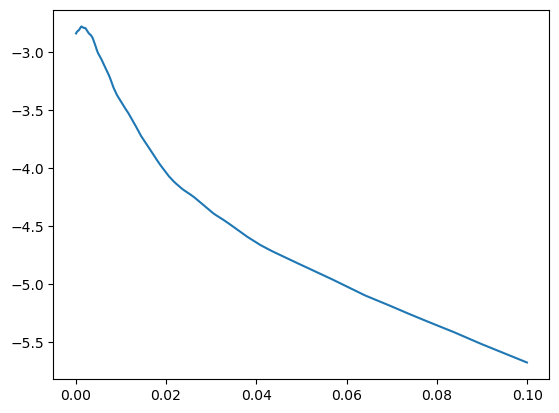

In [44]:
plt.plot(alpha,error)

In [46]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
12,0.0013,-2.78118


#### [4] Random Forest 

In [47]:
rf = RandomForestRegressor()
np.mean(cross_val_score(rf,X_train,
                        y_train,scoring = 'neg_mean_absolute_error', cv= 3))


-1.4519846752582177

#### [5] Tune Models GridsearchCV 

In [49]:
"""
random forest regressor paramters:
--> n_estimatorsint, default=100 : The number of trees in the forest.

--> criterion{“squared_error”, “absolute_error”, “poisson”}, default=”squared_error”
                The function to measure the quality of a split.
                Supported criteria are “squared_error” for the mean squared error,
                which is equal to variance reduction as feature selection criterion,
                “absolute_error” for the mean absolute error,
                and “poisson” which uses reduction in Poisson deviance to find splits.
                Training using “absolute_error” is significantly slower than when using “squared_error”.

--> max_features{“sqrt”, “log2”, None}, int or float, default=1.0
                The number of features to consider when looking for the best split:
            
                ** If int, then consider max_features features at each split.
                ** If float, then max_features is a fraction and
                    max(1, int(max_features * n_features_in_)) features are considered at each split.
                ** If “auto”, then max_features=n_features.
                ** If “sqrt”, then max_features=sqrt(n_features).
                ** If “log2”, then max_features=log2(n_features).
                ** If None or 1.0, then max_features=n_features.            
"""
parameters = {'n_estimators':range(10,300,10),
              'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)



/Users/ahmadsamir/opt/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/Users/ahmadsamir/opt/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/Users/ahmadsamir/opt/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/Users/ahmadsamir/opt/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='sq

RandomForestRegressor(criterion='mae', n_estimators=30)

#### The result of the tuning is 
 - RandomForestRegressor(criterion='mae', n_estimators=30)

In [50]:
gs.best_score_
gs.best_estimator_

RandomForestRegressor(criterion='mae', n_estimators=30)

#### [6] Test Ensembles 

In [55]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

display(mean_absolute_error(y_test,tpred_lm))
display(mean_absolute_error(y_test,tpred_lml))
display(mean_absolute_error(y_test,tpred_rf))

# trying to get best result from the best models, sometimes it work
display(mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2))

4.776594109228618

6.180459150236019

1.0674650698602794

2.5742466839883806

#### Saving The Model in Pickl Format

In [134]:
pickl = {'model': gs.best_estimator_}                                       # making the pick object
pickle.dump( pickl,
            open( 'random_forest_model_file' + ".p", "wb" ) )               # Saving the object in opened file
                                                                            # 'w' means that you'll be writing to the file, and 'b' refers to binary mode. 

pickle

<module 'pickle' from '/Users/ahmadsamir/opt/anaconda3/envs/py37/lib/python3.7/pickle.py'>

In [94]:
# open pickl object for reading and uses
file_name = "random_forest_model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [145]:

model.predict(np.array(list(X_test.iloc[2,:])).reshape(1,-1))[0]

93.5

/Users/ahmadsamir/opt/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


129.5

In [156]:
display(df.iloc[2,:].avg_salary)
display(df.index[df.avg_salary])

93.5

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [168]:
# X_test.iloc[2,:]                      # the row in vertical view
# X_test.iloc[2:3]                      # the row in horizental view
# X_test.index[2]                       # to get the index of ith item in pandas.Series or pandas.DataFrame
# list(X_test.iloc[2,:])                # the values in list
# np.array(X_test.sample(1).iloc[0,:])  # the values in array
# np.array(list(X_test.iloc[2,:]))      # the values in array of list

array([   3,    0,    1,   10,    1,    1,    0,    0,    0,    0,    0,
       3541,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,
          0,    1,    0,    0,    0,    0,    0,    0,    1,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
          0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0,
          0,    0,    0,    0,    1,    0,    0,    0,    1,    0])